In [1]:
# Analyzing csv file

In [2]:
import pandas as pd

# Define the file path
file_path = "vote04a_2022.csv"  # Replace with the correct path to your file

# Step 1: Read the file, skipping the first 4 rows of metadata
data = pd.read_csv(file_path, skiprows=4)

# Step 2: Inspect the data structure
print("First few rows of the dataset:")
print(data.head())

print("\nColumn names:")
print(data.columns)

print("\nData types:")
print(data.dtypes)

print("\nSummary of missing values:")
print(data.isnull().sum())

# Optional: Renaming columns if they appear unnamed or incorrect
# Example: data.columns = ["Column1", "Column2", ...] # Rename as needed

# Step 3: Perform basic EDA
print("\nShape of the dataset:")
print(data.shape)

print("\nDescriptive statistics:")
print(data.describe(include='all'))  # Include all columns, even non-numeric

# Step 4: Check for duplicates
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())

# Step 5: Clean data if necessary
# Handle missing values
# Example: data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Check specific column distributions
# Example: print(data["ColumnOfInterest"].value_counts())

First few rows of the dataset:
      Unnamed: 0 Unnamed: 1 Unnamed: 2 Total registered  \
0  UNITED STATES    255,457    233,546          161,422   
1        ALABAMA      3,857      3,716            2,499   
2         ALASKA        531        516              373   
3        ARIZONA      5,731      5,093            3,560   
4       ARKANSAS      2,277      2,188            1,360   

   Percent registered\r\n(Total)  Margin of error1  \
0                           63.2               0.5   
1                           64.8               3.0   
2                           70.2               2.9   
3                           62.1               3.2   
4                           59.8               3.0   

   Percent registered\r\n(Citizen)  Margin of error1.1 Total voted  \
0                             69.1                 0.5     121,916   
1                             67.3                 2.7       1,688   
2                             72.2                 2.9         282   
3        

In [3]:
#Cleaning the data

In [4]:
# Step 1: Rename columns for clarity
data.columns = [
    "Region", "Registered_A", "Registered_B", "Total_Registered",
    "Percent_Registered_Total", "Margin_Error_1",
    "Percent_Registered_Citizen", "Margin_Error_1_1", "Total_Voted",
    "Percent_Voted_Total", "Margin_Error_2", "Percent_Voted_Citizen",
    "Margin_Error_2_1"
]

# Step 2: Handle numeric columns with formatting issues (remove commas and convert to numeric)
numeric_columns = ["Registered_A", "Registered_B", "Total_Registered", "Total_Voted", ]
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col].str.replace(",", ""), errors='coerce')

# Step 3: Drop rows with missing values or handle them appropriately
data.dropna(inplace=True)  # Or use data.fillna() to handle missing values differently

# Step 4: Exclude the "United States" summary row if analyzing state-specific data
data = data[data["Region"] != "UNITED STATES"]

# Step 5: Clean up and verify
print("\nCleaned Dataset Head:")
print(data.head())

print("\nSummary of Numeric Columns:")
print(data.describe())


Cleaned Dataset Head:
       Region  Registered_A  Registered_B  Total_Registered  \
1     ALABAMA        3857.0        3716.0            2499.0   
2      ALASKA         531.0         516.0             373.0   
3     ARIZONA        5731.0        5093.0            3560.0   
4    ARKANSAS        2277.0        2188.0            1360.0   
5  CALIFORNIA       29870.0       25315.0           17032.0   

   Percent_Registered_Total  Margin_Error_1  Percent_Registered_Citizen  \
1                      64.8             3.0                        67.3   
2                      70.2             2.9                        72.2   
3                      62.1             3.2                        69.9   
4                      59.8             3.0                        62.2   
5                      57.0             1.7                        67.3   

   Margin_Error_1_1  Total_Voted  Percent_Voted_Total  Margin_Error_2  \
1               2.7       1688.0                 43.8             3.3   
2

In [5]:
#Graph that includes all states

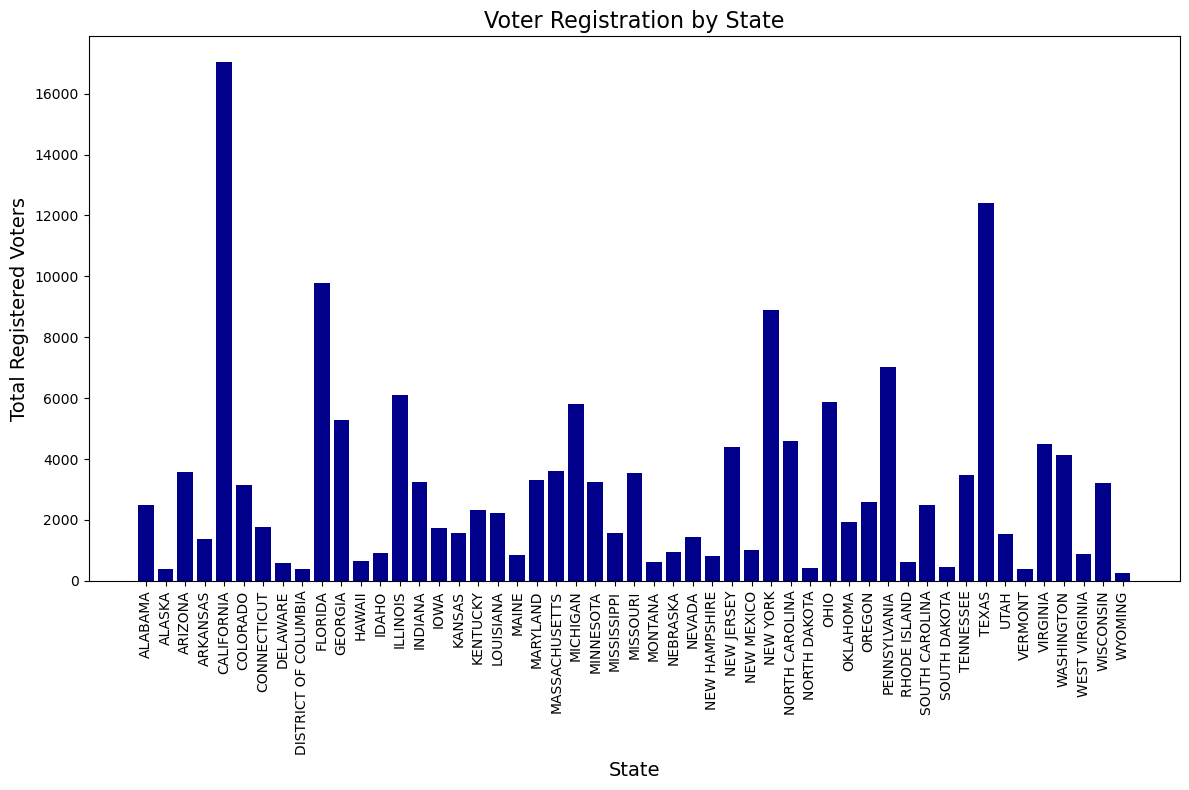

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = "vote04a_2022.csv"  

# Step 1: Read the file, skipping the first 4 rows of metadata
data = pd.read_csv(file_path, skiprows=4)

# Step 2: Rename columns for clarity
data.columns = [
    "Region", "Registered_A", "Registered_B", "Total_Registered",
    "Percent_Registered_Total", "Margin_Error_1",
    "Percent_Registered_Citizen", "Margin_Error_1_1", "Total_Voted",
    "Percent_Voted_Total", "Margin_Error_2", "Percent_Voted_Citizen",
    "Margin_Error_2_1"
]

# Step 3: Handle numeric columns with formatting issues (remove commas and convert to numeric)
numeric_columns = ["Registered_A", "Registered_B", "Total_Registered", "Total_Voted"]
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col].str.replace(",", ""), errors='coerce')

# Step 4: Drop rows with missing values or handle them appropriately
data.dropna(inplace=True)  # Or use data.fillna() to handle missing values differently

# Step 5: Exclude the "United States" summary row if analyzing state-specific data
data = data[data["Region"] != "UNITED STATES"]

# Step 6: Create a bar graph for Total Registered voters by state
plt.figure(figsize=(12, 8))  # Adjust the figure size to give more space for the labels

# Create the bar plot with states on the x-axis and voter registration on the y-axis
plt.bar(data['Region'], data['Total_Registered'], color='darkblue')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='center')  # Rotate 90 degrees and center-align

# Set titles and labels
plt.title('Voter Registration by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Registered Voters', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [7]:
#Graph that includes top 10 states in ascending order

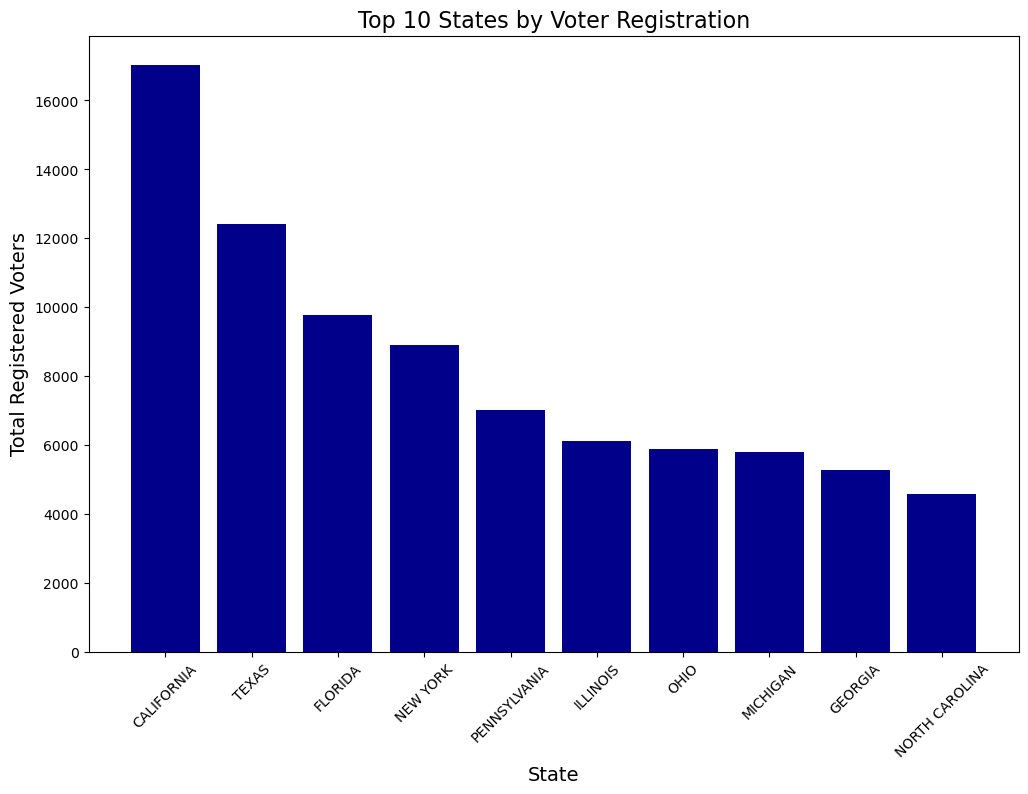

In [8]:
import matplotlib.pyplot as plt

# Sort the data by 'Total_Registered' in descending order and select the top 10 states
data_sorted = data.sort_values(by='Total_Registered', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(data_sorted['Region'], data_sorted['Total_Registered'], color='darkblue')

# Rotate x-axis labels sideways (90 degrees)
plt.xticks(rotation=45, ha='center')

# Set chart title and axis labels
plt.title('Top 10 States by Voter Registration', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Registered Voters', fontsize=14)

# Display the plot
plt.show()

In [9]:
#Graph that includes percent of registered voters in descending order

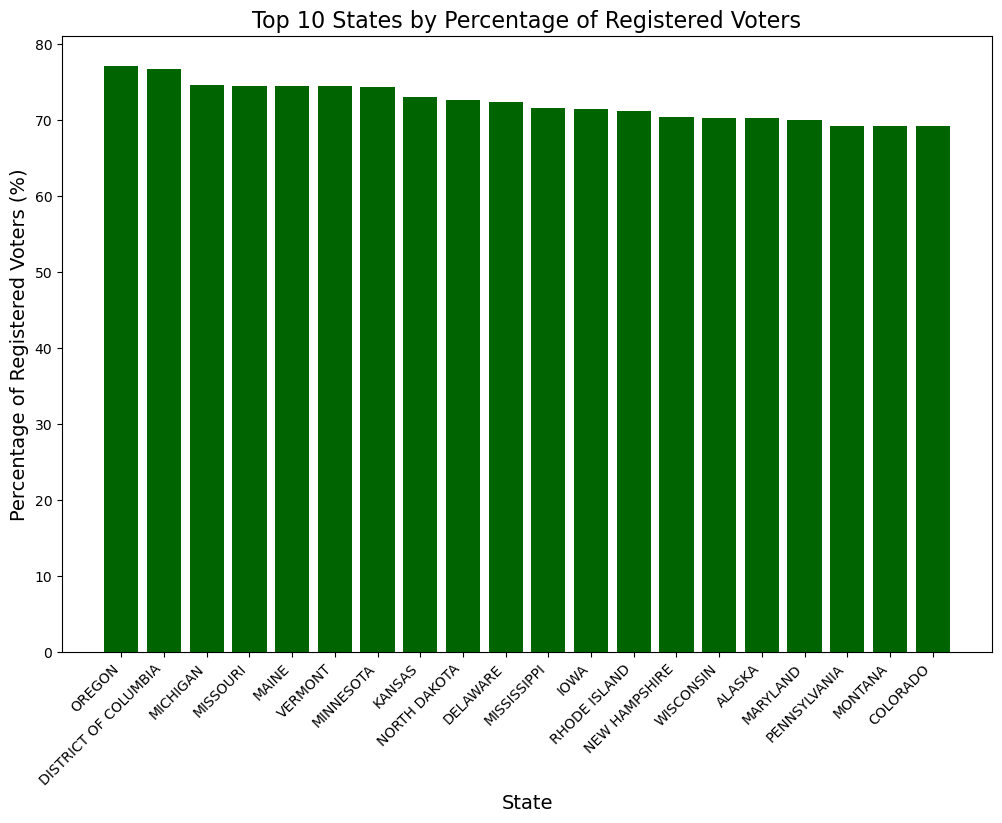

In [10]:
import matplotlib.pyplot as plt

# Calculate the percentage of registered voters for each state
data['Registration_Percent'] = (data['Total_Registered'] / data['Registered_A']) * 100

# Sort the data by 'Registration_Percent' in descending order and select the top 10 states
data_sorted = data.sort_values(by='Registration_Percent', ascending=False).head(20)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(data_sorted['Region'], data_sorted['Registration_Percent'], color='darkgreen')

# Rotate x-axis labels sideways (45 degrees)
plt.xticks(rotation=45, ha='right')

# Set chart title and axis labels
plt.title('Top 10 States by Percentage of Registered Voters', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Percentage of Registered Voters (%)', fontsize=14)

# Display the plot
plt.show()